# Preprocessing Functions


## Constant Variables


In [21]:
punc = r'''!()[]{};:"\,<>./?@#$%^&*_~«»”—“…'''
authors = ['Ataol Behramoğlu', 'Attila İlhan', 'Cahit Sıtkı Tarancı', 'Cahit Zarifoğlu',
 'Can Yücel', 'Cemal Safi', 'Cemal Süreya', 'Edip Cansever',
 'Mehmet Akif Ersoy', 'Nazım Hikmet Ran', 'Necip Fazıl Kısakürek',
 'Orhan Veli Kanık', 'Turgut Uyar', 'Özdemir Asaf', 'Ümit Yaşar Oğuzcan']

max_length = 30

## Functions


In [22]:
def location_to_text(element):
    f = open(element, "r", encoding="utf-8")
    return f.read()

In [23]:
def remove_punctuation(element):
    for ele in element:
        if ele in punc:
            element = element.replace(ele, " ")
    return element

In [24]:
def to_lower(element):
   return element.lower()

In [25]:
def remove_digits(element):
    for ele in element:
        if ele.isdigit():
            element.replace(ele,"")
    return element

In [26]:
def encode_labels(element):
    return authors.index(element)

In [27]:
def tokenize(element):
    return tokenizer(element,truncation=True,padding="max_length", max_length=512)

# Main

In [28]:
#Imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from transformers import BertForSequenceClassification,BertTokenizer,Trainer,TrainingArguments,DataCollatorWithPadding
import torch
from datasets import load_metric
from datasets import Dataset, load_dataset
import ast
import transformers


In [29]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

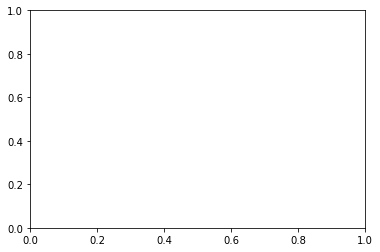

In [30]:
fig, ax = plt.subplots()

In [31]:
#Dataset Import

dataset = pd.read_csv("./Poems.csv", sep=",")

In [32]:
X = dataset.copy()

In [33]:
#Preprocessing


X["Location"] = X["Location"].apply(location_to_text).apply(remove_punctuation).apply(to_lower).apply(remove_digits)
X_copy = X.copy()
y_copy = X_copy.pop("Author")
X.rename(columns={"Location": "Poem"}, inplace=True)
X_copy


,Location
0,yaşadıklarımdan öğrendiğim bir şey var \nyaşad...
1,bu aşk burada biter ve ben çekip giderim\nyüre...
2,ben ölürsem akşamüstü ölürüm\nşehre simsiyah b...
3,anne diyemeyecegim artık bir başkasına \nsesim...
4,hayatın hızıyla yaşadık o aşkı\nher şey bir an...
...,...
2799,i̇ç gıcıklayıcı şarkılar gelir pencerelerden\n...
2800,gitgide alışıyorum sana \n\nhiçbir alışkanlık...
2801,mustafa kemal'i düşünüyorum \nyeleleri alevden...
2802,böyledir akşamları i̇stanbul'un\nbir efkâr bas...


In [34]:
poem = []
author = []
i = 0
for element in X["Poem"]:
    for line in element.split("\n"):
        if not (line.isspace() or len(line)==0):
            author.append(X["Author"][i])
            poem.append(line)
    i += 1


data = {}
data["Poem"] = poem
data["Author"] = author
X = pd.DataFrame(data=data)
X_copy

,Location
0,yaşadıklarımdan öğrendiğim bir şey var \nyaşad...
1,bu aşk burada biter ve ben çekip giderim\nyüre...
2,ben ölürsem akşamüstü ölürüm\nşehre simsiyah b...
3,anne diyemeyecegim artık bir başkasına \nsesim...
4,hayatın hızıyla yaşadık o aşkı\nher şey bir an...
...,...
2799,i̇ç gıcıklayıcı şarkılar gelir pencerelerden\n...
2800,gitgide alışıyorum sana \n\nhiçbir alışkanlık...
2801,mustafa kemal'i düşünüyorum \nyeleleri alevden...
2802,böyledir akşamları i̇stanbul'un\nbir efkâr bas...


In [35]:
y = X.pop("Author")
y = y.apply(encode_labels)

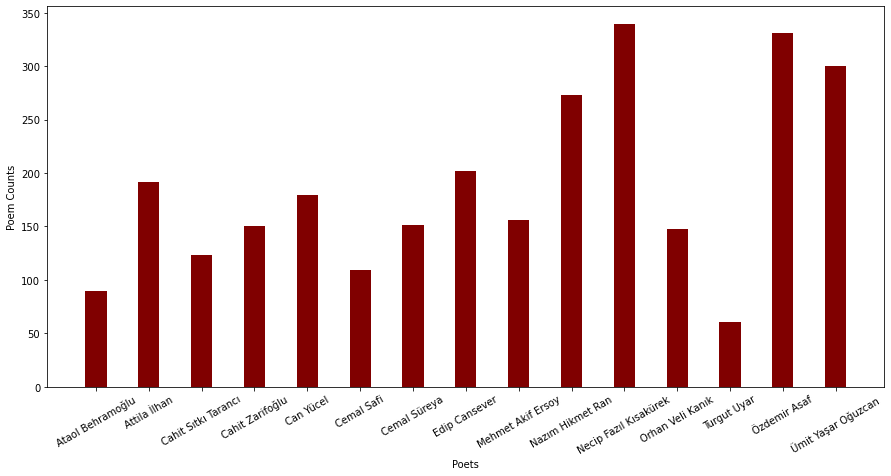

In [36]:
courses = authors
values = dataset.groupby(["Author"]).count()["Location"]
  
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(authors, dataset.groupby(["Author"]).count()["Location"], color ='maroon',
        width = 0.4)
plt.xticks(rotation = 30)
 
plt.xlabel("Poets")
plt.ylabel("Poem Counts")
plt.show()

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X["Poem"].map(tokenize),y,random_state=100, test_size=0.2)
train_dataset = pd.concat([X_train,y_train],axis=1)
test_dataset = pd.concat([X_test,y_test],axis=1)


In [40]:
train_dataset["Poem"]

42991    [input_ids, token_type_ids, attention_mask]
36969    [input_ids, token_type_ids, attention_mask]
41514    [input_ids, token_type_ids, attention_mask]
46511    [input_ids, token_type_ids, attention_mask]
51455    [input_ids, token_type_ids, attention_mask]
                            ...                     
16304    [input_ids, token_type_ids, attention_mask]
79       [input_ids, token_type_ids, attention_mask]
12119    [input_ids, token_type_ids, attention_mask]
14147    [input_ids, token_type_ids, attention_mask]
38408    [input_ids, token_type_ids, attention_mask]
Name: Poem, Length: 41344, dtype: object

In [43]:
train_dataset["input_ids"] = ""
train_dataset["token_type_ids"] = ""
train_dataset["attention_mask"] = ""



for column in ["input_ids", "token_type_ids", "attention_mask"]:
    for i in range(0,len(train_dataset[column])):
       train_dataset[column].iloc[i] = train_dataset["Poem"].iloc[i][column]








E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
test_dataset["input_ids"] = ""
test_dataset["token_type_ids"] = ""
test_dataset["attention_mask"] = ""

for column in ["input_ids", "token_type_ids", "attention_mask"]:
    for i in range(0,len(test_dataset[column])):
        test_dataset[column].iloc[i] = test_dataset["Poem"].iloc[i][column]

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
train_dataset["label"] = train_dataset["Author"]
train_dataset.drop(["Poem","Author"],axis=1,inplace=True)

In [ ]:
test_dataset["label"] = test_dataset["Author"]
test_dataset.drop(["Poem","Author"],axis=1,inplace=True)

In [ ]:
train_dataset.to_csv("./train_dataset.csv",sep=";",index=False)
test_dataset.to_csv("./test_dataset.csv",sep=";",index=False)